<a href="https://colab.research.google.com/github/ncavasin/perceptron/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 11089 - Sistemas Inteligentes - Universidad Nacional de Luján - 2021
# Perceptron

## Consigna
Crear y entrenar un perceptrón capaz de clasificar las entradas recibidas en base a una función linealmente separable:
- El perceptrón debe recibir tres entradas binarias.
- Los pesos finales y el valor de la función umbral no pueden definirse a priori sino que serán determinados por el entrenamiento y los ejemplos en él utilizados.
- La clasificación final sobre el conjunto de datos de entrada debe representarse gráficamente, en la forma de un plano que discrimine los valores de entrada en base a la función representada por el perceptrón.
- Explicar brevemente cada uno de los criterios adoptados durantes las etapas de codificación, entrenamiento y evaluación.
- El rango de cada coordenada debe ser [0, 1.5].

**Fecha de entrega: 08/05/2021**

## Resolución

### Paso 1 - Inicialización:
- Se definen los valores booleanos de las 3 entradas .
- Se define por cada combinación de entradsa el valor de salida de la función lógica OR correspondiente.
- Se los combina en una matriz para facilitar su presentación.

In [29]:
import numpy as np
import pandas as pd

# Hardcodeo los valores de las tres entradas, pues no van a variar
x1 = pd.Series((0, 0, 0, 0, 1, 1, 1, 1), name='x1')
x2 = pd.Series((0, 0, 1, 1, 0, 0, 1, 1), name='x2')
x3 = pd.Series((0, 1, 0, 1, 0, 1, 0, 1), name='x3')

# Defino contador para luego mostrar en matriz
iter = 0

# Los combino en una matriz
matriz = pd.concat([x1, x2, x3], axis=1)

# Defino la funcion de salida, en este caso la funcion logica OR
y = pd.Series((0, 0, 0, 0, 0, 0, 0, 1), name='y')

# La inserto a la tabla
matriz = pd.concat([matriz, y], axis=1)

# Muestro la tabla
matriz

,x1,x2,x3,y
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,1,0,0,0
5,1,0,1,0
6,1,1,0,0
7,1,1,1,1


### Paso 2 - Funciones
Se definen las funciones ``adjust()`` y ``train()``.

#### ``train()``:
Se alimenta de las entradas definidas en la tabla matriz y para cada combinacion calcula un valor de Z cuya fórmula es:
``Z = ``

#### ``adjust()``

In [2]:
def sep_function(z):
    """
    Esta funcion representa la separacion lineal de cada salida obtenida.
    Si z >= 0.5 ==> z = 1
    Si z <  0.5 ==> z = 0
    """

    if z >= 0.5:
        return 1
    else:
        return 0

In [3]:
def adjust(z, y, t, p, lr):
    
    # Calculo error
    error = y - z

    # Ajusto theta
    t = t + (-1 *(lr * error))

    # Ajusto pesos
    p['x1'] += (p['x1'] * lr * error)
    p['x2'] += (p['x2'] * lr * error)
    p['x3'] += (p['x3'] * lr * error)

    return t, p

In [16]:
def train(mat, p, t, lr, e):

    errores = True

    while errores and e < 100:
        errores = False

        # Creo lista para almacenar valores calculados
        z2 = []

        for i in range(0, matriz.shape[0]):

            # Calculo z
            z = ((mat['x1'][i] * p['x1']) + (mat['x2'][i] * p['x2']) + (mat['x3'][i] * p['x3'])) - t

            # Aplico la funcion de separacion
            z = sep_function(z)

            #print(f'z={z} | y={mat["y"][i]} | t ={t}')

            # Verifico si hubo error
            if z != mat['y'][i]:
                errores = True

                # Ajusto
                t, p = adjust(z, mat['y'][i], t, p, lr)
                
                #print(f'AJUSTE = t ={t} | pesos = {p.values()}')
                
                # Incremento contador de iteraciones
                e += 1     
                print(f'Epoch = {e}')
            
            # Agrego el valor calculado a la lista
            z2.append(z)

    return t, p, e, z2

In [47]:
import random 

# Defino los valores iniciales del threshold, learn rate y epochs
threshold = 0.5
learn_rate = 0.2
epochs = 0

# Inicializo pesos al azar
pesos = {}
pesos['x1'] = np.float(round(random.uniform(0, 1.5), 2))
pesos['x2'] = np.float(round(random.uniform(0, 1.5), 2))
pesos['x3'] = np.float(round(random.uniform(0, 1.5), 2))


print('PARAMETROS INICIALES:')
print(f'Epochs = {epochs}')
print(f'Threshold = {threshold:.2f}')
print(f"Vel aprendizaje = {learn_rate}")
for index, value in enumerate(pesos):
    print(f'Peso {index} = {pesos[value]:.4f}')


print('\n\n=== PERIODO DE ENTRENAMIENTO ===')
# Entreno
threshold, pesos, epochs, z = train(matriz, pesos, threshold, learn_rate, epochs)
# Aumento el contador de veces ejecutadas del algoritmo
iter += 1
# Formateo para mostrar
z = pd.Series(np.asarray(z), name=f'z{iter}')
matriz = pd.concat([matriz, z], axis= 1)

print('=== PERIODO DE ENTRENAMIENTO ===')


print('\n\nPARAMETROS FINALES:')
print(f'Epochs = {epochs}')
print(f'Threshold = {threshold:.2f}')
print(f"Vel aprendizaje = {learn_rate}")
for index, value in enumerate(pesos):
    print(f'Peso {index} = {pesos[value]:.4f}')


matriz

PARAMETROS INICIALES:
Epochs = 0
Threshold = 0.50
Vel aprendizaje = 0.2
Peso 0 = 0.2500
Peso 1 = 0.7600
Peso 2 = 1.0400


=== PERIODO DE ENTRENAMIENTO ===
Epoch = 1
Epoch = 2
Epoch = 3
Epoch = 4
Epoch = 5
Epoch = 6
Epoch = 7
Epoch = 8
Epoch = 9
Epoch = 10
Epoch = 11
=== PERIODO DE ENTRENAMIENTO ===


PARAMETROS FINALES:
Epochs = 11
Threshold = 0.70
Vel aprendizaje = 0.2
Peso 0 = 0.1631
Peso 1 = 0.4957
Peso 2 = 0.6784


,x1,x2,x3,y,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12,z13,z14,z15,z16,z17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


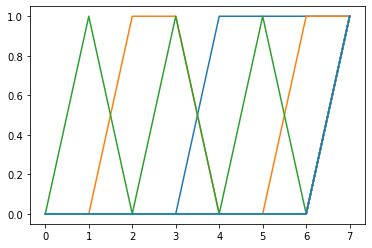

In [48]:
import matplotlib as mp

mp.pyplot.plot(matriz)